In [ ]:
!pip install nltk
import nltk
# Télécharger les outils nécessaires de nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import pandas as pd

# Charger le fichier
data = pd.read_csv("alldata.csv")

# Afficher le nombre de lignes
print(f"Nombre de lignes dans data : {data.shape[0]}")

# Afficher les 4 premières lignes
print("Aperçu des 4 premières lignes :")
print(data.head(4))

# Compter le nombre de positifs et négatifs
label_counts = data['label'].value_counts()
print("\nNombre de commentaires positifs et négatifs :")
print(label_counts)


Nombre de lignes dans data : 21725
Aperçu des 4 premières lignes :
                                        sentence     label
0                 انسان عبارة عن دواء للإكتئاب❤🎤  positive
1              نحبك يا فنان وااااااحسااااااااان❤  positive
2  وحق الرب الى دوا د الاكتئاب الأسطورة❤️❤️❤️❤️😂  positive
3            اسطورة بكل ما تحمل الكلمة من معنى ❤  positive

Nombre de commentaires positifs et négatifs :
label
positive    10884
negative    10841
Name: count, dtype: int64


In [ ]:
import re

# 1. Vérifier les lignes vides dans 'sentence' ou 'label'
print("Nombre de lignes vides dans 'sentence' :", data['sentence'].isnull().sum())
print("Nombre de lignes vides dans 'label' :", data['label'].isnull().sum())

# 2. Compter les phrases contenant des caractères latins
def contains_latin(text):
    return bool(re.search(r'[a-zA-Z]', str(text)))

# Filtrer les lignes contenant des caractères latins
latin_sentences = data[data['sentence'].apply(contains_latin)]

# Compter le nombre de lignes avec caractères latins
latin_count = latin_sentences.shape[0]
print(f"Nombre de lignes contenant des caractères latins : {latin_count}")

# Afficher quelques exemples de phrases contenant des caractères latins
print("\nExemples de lignes contenant des caractères latins :")
print(latin_sentences[['sentence']].head())


Nombre de lignes vides dans 'sentence' : 3
Nombre de lignes vides dans 'label' : 0
Nombre de lignes contenant des caractères latins : 42

Exemples de lignes contenant des caractères latins :
                                                sentence
14175     تفو عليكم أوجه كاكا      ni beauté ni Venu tôt
14308                            اش هاد الزبل...signaler
14513                                شوف tv قناة الفضائح
14582  لعنة الله على شوف TV الى يوم الدين وجميع العام...
14592  بقوت م الأغنيت top سماكيت ألخوت ههههه سير الين...


In [ ]:
import re

import re

# Fonction complète pour le nettoyage du texte
def clean_text(text):
    # 1. Supprimer les balises HTML tout en conservant leur contenu
    text = re.sub(r'<.*?>', '', text)  # Exemple : "<a>link</a>" devient "link"

    # 2. Supprimer les caractères @ et # mais conserver le contenu du tag
    text = re.sub(r'[@#]', '', text)  # Supprime uniquement les caractères @ et #

    # 3. Supprimer les chiffres arabes et latins
    text = re.sub(r'[0-9٠-٩]', '', text)  # Supprime les chiffres 0-9 et ٠-٩

    # 4. Supprimer les caractères spéciaux, la ponctuation et les symboles
    text = re.sub(r'[^ء-ي\u0600-\u06FFa-zA-Z\s]', '', text)  # Garde les lettres arabes et latines uniquement

    # 5. Supprimer les emojis
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # Emoticônes visage
        u"\U0001F300-\U0001F5FF"  # Symboles & pictogrammes
        u"\U0001F680-\U0001F6FF"  # Transport & cartes
        u"\U0001F1E0-\U0001F1FF"  # Drapeaux (iOS)
        u"\U00002500-\U00002BEF"  # Lignes
        u"\U00002702-\U000027B0"  # Symboles divers
        u"\U00002B50\U0001F004"  # Étoiles & carreaux
        "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)

    # 6. Retirer les espaces multiples et inutiles
    text = re.sub(r'\s+', ' ', text).strip()

    return text


# Appliquer la fonction pour nettoyer la colonne 'sentence' (remplacement direct)
data['sentence'] = data['sentence'].apply(lambda x: clean_text(str(x)))

# Supprimer les lignes vides après nettoyage
data = data[data['sentence'] != '']

# Vérifier si des lignes vides restent dans 'sentence'
print(f"Nombre de lignes vides restantes : {data['sentence'].isnull().sum()}")

# Afficher un aperçu des phrases nettoyées
print("Aperçu des phrases nettoyées :")
print(data.head())



Nombre de lignes vides restantes : 0
Aperçu des phrases nettoyées :
                               sentence     label
0          انسان عبارة عن دواء للإكتئاب  positive
1      نحبك يا فنان وااااااحسااااااااان  positive
2  وحق الرب الى دوا د الاكتئاب الأسطورة  positive
3     اسطورة بكل ما تحمل الكلمة من معنى  positive
4                        أسطورة لن تكرر  positive


In [ ]:
import re

# Fonction pour suppression des répétitions de lettres, ponctuations et espaces
def remove_duplicates(text):
    # 1. Réduire les lettres répétées (plus de 2 fois) à 2 occurrences
    text = re.sub(r'(.)\1{2,}', r'\1\1', text)  # Exemple : جميييل → جميل, tooop → toop

    # 2. Réduire les ponctuations répétées (comme ..., !!!!) à une seule occurrence
    text = re.sub(r'([.!?,])\1{1,}', r'\1', text)  # Exemple : !!!! → !, .... → .

    # 3. Réduire les espaces multiples en un seul espace
    text = re.sub(r'\s+', ' ', text)  # Exemple : "   " → " "

    # 4. Retirer les espaces inutiles au début et à la fin
    text = text.strip()

    return text

# Appliquer la fonction directement sur la colonne 'sentence'
data['sentence'] = data['sentence'].apply(lambda x: remove_duplicates(str(x)))

# Aperçu des phrases après nettoyage
print("Aperçu des phrases après suppression des duplications :")
print(data.head())


Aperçu des phrases après suppression des duplications :
                               sentence     label
0          انسان عبارة عن دواء للإكتئاب  positive
1                 نحبك يا فنان وااحساان  positive
2  وحق الرب الى دوا د الاكتئاب الأسطورة  positive
3     اسطورة بكل ما تحمل الكلمة من معنى  positive
4                        أسطورة لن تكرر  positive


In [ ]:
import re

# Fonction de tokenisation simple basée sur les espaces et caractères spéciaux
def simple_tokenize(text):
    # Diviser par les espaces et supprimer les caractères spéciaux
    tokens = re.findall(r'\b\w+\b', text)  # Garde uniquement les mots alphanumériques
    return tokens

# Appliquer la tokenisation simple sur la colonne 'sentence'
data['tokens'] = data['sentence'].apply(lambda x: simple_tokenize(str(x)))

# Afficher un aperçu des phrases tokenisées
print("Aperçu des phrases tokenisées :")
print(data[['sentence', 'tokens']].head())

# Enregistrer le dataset
data.to_csv("simple_tokenized_data.csv", index=False, encoding='utf-8')
print("\n✅ Tokenisation simple terminée. Fichier sauvegardé sous 'simple_tokenized_data.csv'.")


Aperçu des phrases tokenisées :
                               sentence  \
0          انسان عبارة عن دواء للإكتئاب   
1                 نحبك يا فنان وااحساان   
2  وحق الرب الى دوا د الاكتئاب الأسطورة   
3     اسطورة بكل ما تحمل الكلمة من معنى   
4                        أسطورة لن تكرر   

                                         tokens  
0            [انسان, عبارة, عن, دواء, للإكتئاب]  
1                    [نحبك, يا, فنان, وااحساان]  
2  [وحق, الرب, الى, دوا, د, الاكتئاب, الأسطورة]  
3     [اسطورة, بكل, ما, تحمل, الكلمة, من, معنى]  
4                            [أسطورة, لن, تكرر]  

✅ Tokenisation simple terminée. Fichier sauvegardé sous 'simple_tokenized_data.csv'.


In [ ]:
stop_words = [
    "إذ", "إذا", "إذما", "إذن", "أف", "أقل", "أكثر", "ألا", "إلا", "التي", "الذي", "الذين", "إلى", "إليك",
    "إليكم", "إليكما", "إليكن", "أم", "أما", "إما", "أن", "إن", "إنا", "أنا", "أنت", "أنتم", "أنتما", "أنتن",
    "إنما", "إنه", "أنى", "آه", "آها", "أو", "أوه", "آي", "أي", "أيها", "إي", "أين", "أينما", "إيه", "بخ",
    "بس", "بعض", "بك", "بكم", "بكما", "بكن", "بل", "بلى", "بما", "بماذا", "بمن", "بنا", "به", "بها", "بهم",
    "حاشا", "حبذا", "حتى", "حيث", "حيثما", "حين", "خلا", "دون", "ذا", "ذات", "ذاك", "ذان", "ذلك", "ذين",
    "ذينك", "سوف", "سوى", "عدا", "عسى", "عل", "على", "عليك", "عليه", "عما", "عن", "عند", "غير", "فإذا",
    "فإن", "فلا", "فمن", "في", "فيم", "فيما", "فيه", "فيها", "قد", "كأن", "كأنما", "كأي", "كأين", "كذا",
    "كذلك", "كل", "كلا", "كلاهما", "كلتا", "كلما", "كليكما", "كليهما", "كم", "كما", "كي", "كيت", "كيف",
    "كيفما", "لا", "لاسيما", "لدى", "لست", "لستم", "لسنا", "لعل", "لك", "لكم", "لكما", "لكن", "لكنما",
    "لكي", "لكيلا", "لم", "لما", "لن", "هل", "هلا", "هم", "هما", "هنا", "هناك", "هنالك", "هو", "هي",
    "هيا", "هيهات", "والذي", "والذين", "وإذ", "هذا", "علاش", "قبل", "انه", "مع", "اني", "واش", "هه",
    "الي", "الا", "ما", "و", "لي", "و الله", "ليس", "نحن", "دبا", "علينا", "بالله", "ديال", "وإذا",
    "ولا", "ولو", "وما", "ومن", "وهو", "يا", "أبٌ", "أخٌ", "حمٌ", "فو", "أنتِ", "يناير", "فبراير",
    "مارس", "أبريل", "مايو", "يونيو", "يوليو", "أغسطس", "سبتمبر", "أكتوبر", "نوفمبر", "ديسمبر",
    "جانفي", "فيفري", "أفريل", "جوان", "جويلية", "أوت", "دولار", "دينار", "ريال", "درهم", "ليرة",
    "جنيه", "قرش", "مليم", "فلس", "سنتيم", "يورو", "ين", "يوان", "شيكل", "واحد", "اثنان", "ثلاثة",
    "أربعة", "خمسة", "ستة", "سبعة", "ثمانية", "تسعة", "عشرة", "أحد", "اثنا", "إحدى", "ثلاث", "أربع",
    "خمس", "ست", "سبع", "ثماني", "تسع", "عشر", "ثمان", "سبت", "أحد", "اثنين", "ثلاثاء", "أربعاء",
    "خميس", "جمعة", "أول", "ثان", "ثاني", "ثالث", "رابع", "خامس", "سادس", "سابع", "ثامن", "تاسع",
    "عاشر", "حادي", "أ", "ب", "ت", "ث", "ج", "ح", "خ", "د", "ذ", "ر", "ز", "س", "ش", "ص", "ض", "ط",
    "ظ", "ع", "غ", "ف", "ق", "ك", "ل", "م", "ن", "ه", "و", "ي", "ء", "ى", "آ", "ؤ", "ئ", "أ", "ة",
    "نا", "ك", "كن", "ه", "فلان", "وا", "آمينَ", "آهِ", "آهٍ", "إيهٍ", "بخٍ", "وا", "ألفى", "تخذ",
    "ترك", "تعلَّم", "جعل", "حجا", "حبيب", "خال", "حسب", "درى", "رأى", "زعم", "صبر", "نَّ", "هلّا",
    "وا", "أل", "إلّا", "ت", "ك", "لمّا", "ن", "ه", "ا", "ي", "تجاه", "تلقاء", "جميع", "حسب",
    "سبحان", "شبه", "لعمر", "مثل", "أبو", "أخو", "فو", "مئة", "مئتان", "ثلاثمئة", "أربعمئة",
    "خمسمئة", "ستمئة", "سبعمئة", "ثمنمئة", "تسعمئة", "مائة", "ثلاثمائة", "أربعمائة",
    "خمسمائة", "ستمائة", "سبعمائة", "ثمانمئة", "تسعمائة", "عشرون", "ثلاثون", "اربعون",
    "خمسون", "ستون", "سبعون", "ثمانون", "تسعون", "عشرين", "ثلاثين", "اربعين", "خمسين",
    "ستين", "سبعين", "ثمانين", "تسعين", "بضع", "نيف", "أجمع", "جميع", "عامة", "عين", "نفس",
    "أصلا", "أهلا", "أيضا", "بعدا", "بغتة", "حقا", "حمدا", "خاصة", "ان", "دواليك", "باش",
    "من", "سحقا", "واللّه", "اللّه", "سرا", "سمعا", "صبرا", "صدقا", "صراحة", "طرا", "عجبا",
    "عيانا", "غالبا"
]


In [ ]:
# Convertir la liste des stop words en ensemble pour des recherches rapides
stop_words_set = set(stop_words)

# Fonction pour supprimer les stop words d'une liste de tokens
def remove_stopwords(tokens):
    return [token for token in tokens if token not in stop_words_set]

# Appliquer la suppression des stop words sur la colonne 'tokens'
data['clean_tokens'] = data['tokens'].apply(remove_stopwords)

# Afficher un aperçu des tokens après suppression des stop words
print("Aperçu des tokens après suppression des stop words :")
print(data[['tokens', 'clean_tokens']].head())

# Sauvegarder le dataset avec les tokens nettoyés
data.to_csv("stopwords_removed_data.csv", index=False, encoding='utf-8')
print("\n✅ Suppression des stop words terminée. Fichier sauvegardé sous 'stopwords_removed_data.csv'.")


Aperçu des tokens après suppression des stop words :
                                         tokens  \
0            [انسان, عبارة, عن, دواء, للإكتئاب]   
1                    [نحبك, يا, فنان, وااحساان]   
2  [وحق, الرب, الى, دوا, د, الاكتئاب, الأسطورة]   
3     [اسطورة, بكل, ما, تحمل, الكلمة, من, معنى]   
4                            [أسطورة, لن, تكرر]   

                                clean_tokens  
0             [انسان, عبارة, دواء, للإكتئاب]  
1                     [نحبك, فنان, وااحساان]  
2  [وحق, الرب, الى, دوا, الاكتئاب, الأسطورة]  
3          [اسطورة, بكل, تحمل, الكلمة, معنى]  
4                             [أسطورة, تكرر]  

✅ Suppression des stop words terminée. Fichier sauvegardé sous 'stopwords_removed_data.csv'.


In [ ]:
import re

def normalize_tokens(tokens):
    normalized_tokens = []
    for token in tokens:
        # Normalisation des caractères arabes
        token = token.replace("أ", "ا").replace("إ", "ا").replace("آ", "ا")
        token = token.replace("ة", "ه")
        token = token.replace("ى", "ي")
        token = token.replace("ؤ", "و")
        token = token.replace("ئ", "ي")

        # Suppression des diacritiques (voyelles courtes)
        token = re.sub(r'[\u0610-\u061A\u064B-\u065F]', '', token)

        normalized_tokens.append(token)
    return normalized_tokens
# Appliquer la normalisation sur la colonne 'clean_tokens'
data['normalized_tokens'] = data['clean_tokens'].apply(normalize_tokens)

# Afficher un aperçu des tokens normalisés
print("Aperçu des tokens après normalisation :")
print(data[['clean_tokens', 'normalized_tokens']].head())



Aperçu des tokens après normalisation :
                                clean_tokens  \
0             [انسان, عبارة, دواء, للإكتئاب]   
1                     [نحبك, فنان, وااحساان]   
2  [وحق, الرب, الى, دوا, الاكتئاب, الأسطورة]   
3          [اسطورة, بكل, تحمل, الكلمة, معنى]   
4                             [أسطورة, تكرر]   

                           normalized_tokens  
0             [انسان, عباره, دواء, للاكتياب]  
1                     [نحبك, فنان, وااحساان]  
2  [وحق, الرب, الي, دوا, الاكتياب, الاسطوره]  
3          [اسطوره, بكل, تحمل, الكلمه, معني]  
4                             [اسطوره, تكرر]  


In [ ]:
# Sauvegarder le dataset final
data.to_csv("normalized_data.csv", index=False, encoding='utf-8')
print("\n✅ Normalisation des tokens terminée. Fichier sauvegardé sous 'normalized_data.csv'.")



✅ Normalisation des tokens terminée. Fichier sauvegardé sous 'normalized_data.csv'.


Statistiques sur la longueur des phrases :
count    21028.000000
mean        11.975889
std         13.343722
min          1.000000
25%          4.000000
50%          8.000000
75%         15.000000
max        314.000000
Name: sentence_length, dtype: float64


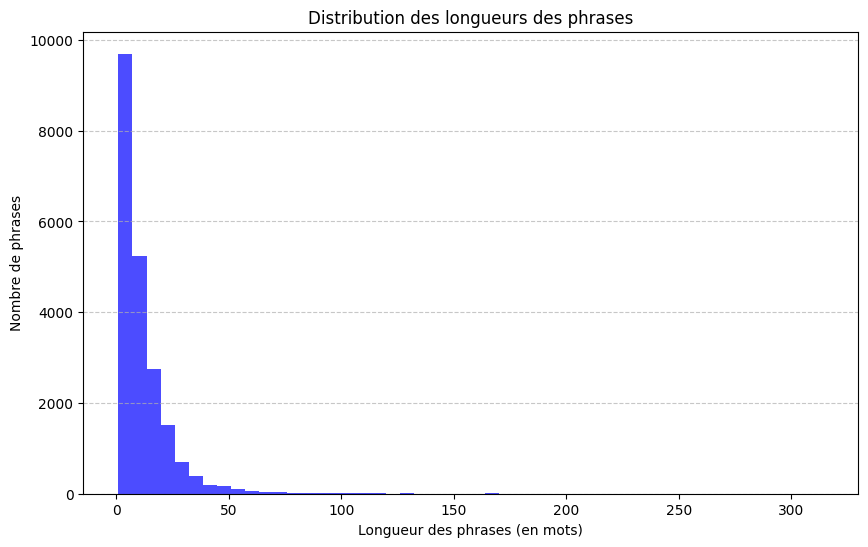


✅ Longueur maximale d'une phrase : 314


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Calculer la longueur des phrases
data['sentence_length'] = data['sentence'].apply(lambda x: len(str(x).split()))

# Afficher quelques statistiques
print("Statistiques sur la longueur des phrases :")
print(data['sentence_length'].describe())

# Histogramme pour la distribution des longueurs
plt.figure(figsize=(10, 6))
plt.hist(data['sentence_length'], bins=50, color='blue', alpha=0.7)
plt.title("Distribution des longueurs des phrases")
plt.xlabel("Longueur des phrases (en mots)")
plt.ylabel("Nombre de phrases")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Trouver la longueur maximale
max_length = data['sentence_length'].max()
print(f"\n✅ Longueur maximale d'une phrase : {max_length}")


Statistiques sur la longueur des phrases :
count    21028.000000
mean        11.975889
std         13.343722
min          1.000000
25%          4.000000
50%          8.000000
75%         15.000000
max        314.000000
Name: sentence_length, dtype: float64

✅ Longueur maximale d'une phrase : 314
📊 Longueur correspondant à 80% des phrases : 17 mots
📊 Longueur correspondant à 90% des phrases : 62 mots


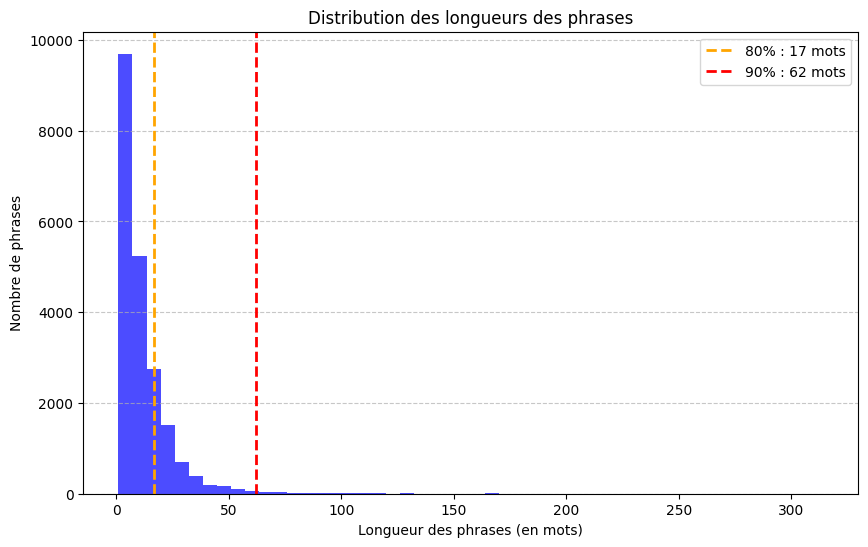

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculer la longueur des phrases
data['sentence_length'] = data['sentence'].apply(lambda x: len(str(x).split()))

# Afficher quelques statistiques descriptives
print("Statistiques sur la longueur des phrases :")
print(data['sentence_length'].describe())

# Calculer les percentiles
percentile_80 = data['sentence_length'].quantile(0.8)  # 80e percentile
percentile_90 = data['sentence_length'].quantile(0.99)  # 90e percentile

print(f"\n✅ Longueur maximale d'une phrase : {data['sentence_length'].max()}")
print(f"📊 Longueur correspondant à 80% des phrases : {percentile_80:.0f} mots")
print(f"📊 Longueur correspondant à 90% des phrases : {percentile_90:.0f} mots")

# Histogramme pour la distribution des longueurs
plt.figure(figsize=(10, 6))
plt.hist(data['sentence_length'], bins=50, color='blue', alpha=0.7)
plt.axvline(percentile_80, color='orange', linestyle='dashed', linewidth=2, label=f"80% : {percentile_80:.0f} mots")
plt.axvline(percentile_90, color='red', linestyle='dashed', linewidth=2, label=f"90% : {percentile_90:.0f} mots")
plt.title("Distribution des longueurs des phrases")
plt.xlabel("Longueur des phrases (en mots)")
plt.ylabel("Nombre de phrases")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
